In [60]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
wd = '../../assets/dataset/bikeshare/bikeshare.csv'
bike_data = pd.read_csv(wd)

In [8]:
bike_data.head()
print bike_data.describe()

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

            weathersit      temp     atemp       hum  windspeed  registered
weathersit    1.000000 -0.102640 -0.105563  0.418130   0.026226   -0.120966
temp         -0.102640  1.000000  0.987672 -0.069881  -0.023125    0.335361
atemp        -0.105563  0.987672  1.000000 -0.051918  -0.062336    0.332559
hum           0.418130 -0.069881 -0.051918  1.000000  -0.290105   -0.273933
windspeed     0.026226 -0.023125 -0.062336 -0.290105   1.000000    0.082321
registered   -0.120966  0.335361  0.332559 -0.273933   0.082321    1.000000


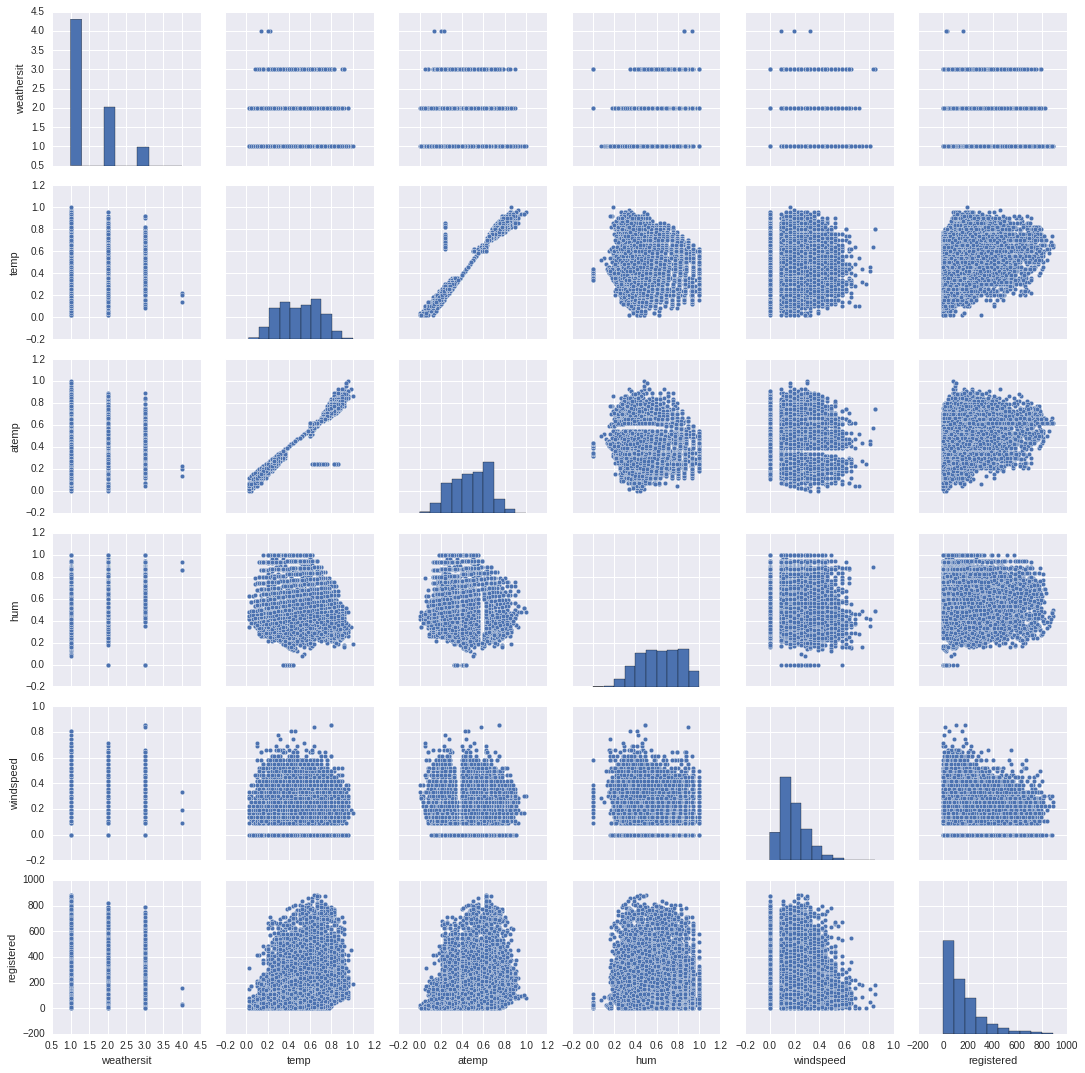

In [17]:
#looks like we have weather-related data and time-related data

weather = bike_data[['weathersit','temp','atemp','hum','windspeed','registered']]
print weather.corr()
sns.pairplot(weather)

Maybe looking at correlations can guide me to which variables are more interesting to look at.

By visual inspection, .3 seemed like a decent cut-off

In [30]:
bike_data.corr()['registered'] > .3

instant       False
season        False
yr            False
mnth          False
hr             True
holiday       False
weekday       False
workingday    False
weathersit    False
temp           True
atemp          True
hum           False
windspeed     False
casual         True
registered     True
cnt            True
Name: registered, dtype: bool

Make sure that there is no correlation between temp and hr. There is a slight correletion as would be expected, but
not something to be concerned about

In [81]:
bike_data[['temp','hr']].corr()

,temp,hr
temp,1.000000,0.137603
hr,0.137603,1.000000


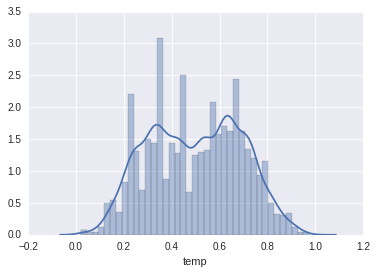

In [36]:
#For now let me just look at the hr and temp. Make sure they are scaled properly. Don't have to do that here, but a doesn't hurt

sns.distplot(bike_data['temp'])

In [166]:
cut_data = bike_data[['temp','registered']]

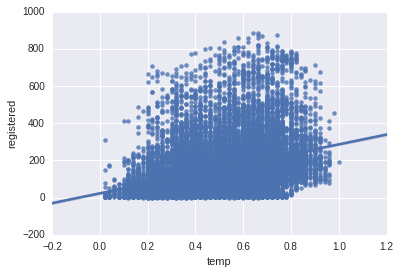

In [167]:
sns.regplot(cut_data['temp'],cut_data['registered'])

In [168]:
cut_data.describe()

,temp,registered
count,17379.000000,17379.000000
mean,0.496987,153.786869
std,0.192556,151.357286
min,0.020000,0.000000
25%,0.340000,34.000000
50%,0.500000,115.000000
75%,0.660000,220.000000
max,1.000000,886.000000


In [169]:
#Convert hour to dummy variables

hour_dummy = pd.get_dummies(bike_data['hr'],prefix='hour')

Joining dummy table to original cut_data WITHOUT one dummy column (hour_0 is gone)

In [170]:
cut_data = cut_data.join(hour_dummy[hour_dummy.columns[1:]])

Fun stuff with getting the formula_string. Can you figure out what the hell is going on here?

In [171]:
formula_string = 'registered~' + '+'.join(cut_data.columns.difference(pd.Index(['registered'])))

In [172]:
#Run the model
lm = smf.ols(formula = formula_string,data=cut_data).fit()

In [173]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     965.9
Date:                Thu, 22 Sep 2016   Prob (F-statistic):               0.00
Time:                        22:57:47   Log-Likelihood:            -1.0452e+05
No. Observations:               17379   AIC:                         2.091e+05
Df Residuals:                   17354   BIC:                         2.093e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -48.3428      4.129    -11.707      0.000       -56.437   -40.249
hour_1       -15.2831      5.205     -2.936      0.003       -25.486    -5.080
hour_10       76.9174      5.201     14.788      0.000        66.722    87.113
hour_11       93.9875      5.204     18.059      0.000        83.786   104.189
hour_12      126.9277      5.206     24.380      0.000       116.723   137.132
hour_13      120.4099      5.208     23.120      0.000       110.202   130.618
hour_14      102.4011      5.211     19.651      0.000        92.187   112.615
hour_15      112.6504      5.212     21.614      0.000       102.434   122.867
hour_16      175.2811      5.209     33.649      0.000       165.071   185.492
hour_17      326.2665      5.206     62.669      0.000       316.062   336.471
hour_18      306.1172      5.206     58.797      0.000       295.912   316.322
hour_19      207.8300      5.203     39.945      0.000       197.632   218.028
hour_2       -23.1128      5.222     -4.426      0.000       -33.348   -12.878
hour_20      137.9427      5.201     26.525      0.000       127.749   148.136
hour_21       94.8246      5.199     18.239      0.000        84.634   105.015
hour_22       61.9749      5.198     11.922      0.000        51.786    72.164
hour_23       27.3916      5.198      5.270      0.000        17.203    37.580
hour_3       -31.9116      5.256     -6.072      0.000       -42.213   -21.610
hour_4       -34.5465      5.256     -6.573      0.000       -44.849   -24.244
hour_5       -19.0974      5.219     -3.659      0.000       -29.328    -8.867
hour_6        35.0268      5.205      6.729      0.000        24.824    45.229
hour_7       162.8488      5.201     31.311      0.000       152.654   173.043
hour_8       296.0381      5.200     56.931      0.000       285.846   306.231
hour_9       142.8432      5.200     27.471      0.000       132.651   153.035
temp         197.0055      4.016     49.052      0.000       189.133   204.878
==============================================================================
Omnibus:                     1823.085   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5938.425
Skew:                           0.535   Prob(JB):                         0.00
Kurtosis:                       5.656   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What I'm doing below is plotting the fitted values (i.e. predicted training values versus the residuals).

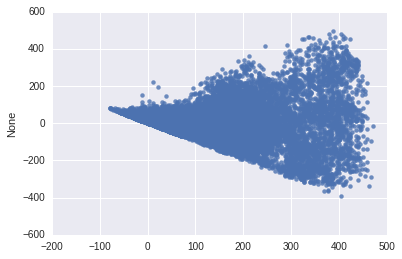

In [174]:
sns.regplot(lm.predict(),lm.resid,fit_reg = False)

### Important Diagnostics:

See this fanout of residuals as the fitted values get larger? This implies that our erros aren't constant variance. This is somestimes called **heteroskedasticity**. As the response variable grows, so do the erros. This clearly breaks the linearity assumption. We may be able to fix problem by doing a transform on the response variable

In [158]:
log_reg = np.log10(cut_data['registered'] + 1)
log_reg.name = 'log_reg'      #Need to rename the series because the join function below uses that name for the new-
#joined column. Otherwise, join complains that we have overlapping column names with the existing 'registered' name.
cut_data = cut_data.join(log_reg)

In [159]:
formula_string = 'log_reg~' + '+'.join(cut_data.columns.difference(pd.Index(['registered','log_reg'])))

In [160]:
lm = smf.ols(formula = formula_string,data=cut_data).fit()

In [161]:
lm.summary()   #YAY! A better R-squared value :P

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_reg   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2194.
Date:                Thu, 22 Sep 2016   Prob (F-statistic):               0.00
Time:                        22:49:57   Log-Likelihood:                -3868.6
No. Observations:               17379   AIC:                             7787.
Df Residuals:                   17354   BIC:                             7981.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2014      0.013     95.311      0.000         1.177     1.226
hour_1        -0.2652      0.016    -16.688      0.000        -0.296    -0.234
hour_10        0.4915      0.016     30.953      0.000         0.460     0.523
hour_11        0.5376      0.016     33.838      0.000         0.506     0.569
hour_12        0.6250      0.016     39.328      0.000         0.594     0.656
hour_13        0.6076      0.016     38.219      0.000         0.576     0.639
hour_14        0.5574      0.016     35.043      0.000         0.526     0.589
hour_15        0.5852      0.016     36.784      0.000         0.554     0.616
hour_16        0.7198      0.016     45.266      0.000         0.689     0.751
hour_17        0.9098      0.016     57.250      0.000         0.879     0.941
hour_18        0.8911      0.016     56.068      0.000         0.860     0.922
hour_19        0.7697      0.016     48.463      0.000         0.739     0.801
hour_2        -0.4756      0.016    -29.840      0.000        -0.507    -0.444
hour_20        0.6427      0.016     40.482      0.000         0.612     0.674
hour_21        0.5367      0.016     33.817      0.000         0.506     0.568
hour_22        0.4277      0.016     26.953      0.000         0.397     0.459
hour_23        0.2529      0.016     15.939      0.000         0.222     0.284
hour_3        -0.6831      0.016    -42.578      0.000        -0.715    -0.652
hour_4        -0.7929      0.016    -49.419      0.000        -0.824    -0.761
hour_5        -0.3416      0.016    -21.439      0.000        -0.373    -0.310
hour_6         0.1567      0.016      9.865      0.000         0.126     0.188
hour_7         0.5668      0.016     35.698      0.000         0.536     0.598
hour_8         0.8410      0.016     52.984      0.000         0.810     0.872
hour_9         0.6795      0.016     42.807      0.000         0.648     0.711
temp           0.7070      0.012     57.671      0.000         0.683     0.731
==============================================================================
Omnibus:                     1307.305   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2135.655
Skew:                          -0.579   Prob(JB):                         0.00
Kurtosis:                       4.268   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

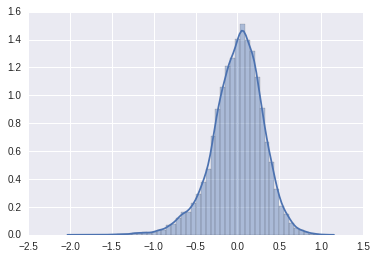

In [162]:
sns.distplot(lm.resid)

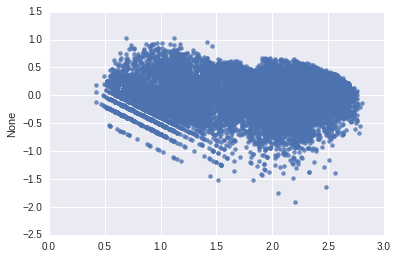

In [163]:
sns.regplot(lm.predict(),lm.resid,fit_reg = False)

### Some weirdness, but definitely less fan-out of errors compared to above